How do properly install the matlab kernel and tutorial:
https://am111.readthedocs.io/en/latest/jmatlab_use.html

In [3]:
format compact

In [7]:
disp('hello from MATLAB')

hello from MATLAB



In [8]:
tx = linspace (-8, 8, 41);
ty = tx;
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;

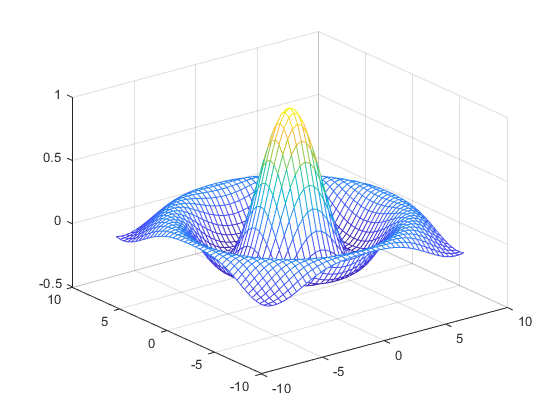

In [9]:
%plot inline
mesh(tx, ty, tz);

In [10]:
%plot native
mesh(tx, ty, tz);

In [13]:
%You can still use “close all” to close the window that was opened by cell above.
close all

In [22]:
%List Variables in memory:
whos

  Name       Size            Bytes  Class     Attributes

  r         41x41            13448  double              
  tx         1x41              328  double              
  ty         1x41              328  double              
  tz        41x41            13448  double              
  x          1x1                 8  double              
  xx        41x41            13448  double              
  yy        41x41            13448  double              




In [14]:
?%plot

In [15]:
?dplotmatrix

In [17]:
?%python

In [19]:
?%run

In [20]:
?%load

In [29]:
%Shell commands:
!dir

 Volume in drive C has no label. 
 Volume Serial Number is EAC7-318F 
 
 Directory of C:\Benchmarking 
 
04/12/2019  02:40 PM    <DIR>          . 
04/12/2019  02:40 PM    <DIR>          .. 
04/12/2019  02:39 PM    <DIR>          .ipynb_checkpoints 
04/11/2019  05:14 PM            68,521 AlgoPerf.csv 
04/01/2019  06:04 PM             2,111 auto_ml_analytics_results_MEDV.csv 
04/02/2019  04:05 AM             5,567 auto_ml_analytics_results_NumberOfSales.csv 
04/11/2019  01:33 PM            54,388 Benchmark_Model.ipynb 
04/08/2019  08:49 PM         3,639,429 FcstPrep.ipynb 
04/11/2019  05:08 PM            81,878 GradientBoostingRegressor.ipynb 
04/10/2019  11:20 AM    <DIR>          Make_Money_with_Tensorflow_2.0-master 
04/12/2019  02:40 PM            92,845 Matlab_Jupyter_NB.ipynb 
04/07/2019  10:29 AM           284,390 testBench.csv 
03/27/2019  11:06 AM         7,315,400 test_processed.csv 
04/07/2019  10:01 AM        10,436,776 trainBench.csv 
03/27/2019  11:06 AM        87,217,091 t

In [30]:
!pip list|grep pandas

pandas                            0.23.4               



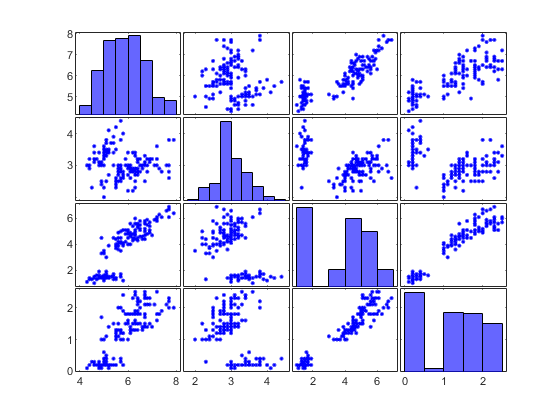

In [44]:
load iris_dataset.mat;
figure('Units','normalized','Position',[0.13,0.11,0.3875,0.40])
%plot inline
gplotmatrix(irisInputs')

https://www.mathworks.com/help/gads/example-comparing-several-solvers.html#bsdussr

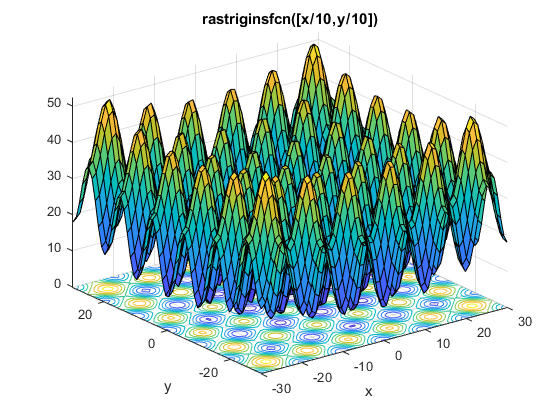

In [1]:
rf3 = @(x,y)rastriginsfcn([x./10,y./10]);
ezsurfc(rf3,[-30 30])

# fminunc

In [4]:
rf2 = @(x)rastriginsfcn(x/10); % objective
x0 = [20,30]; % start point away from the minimum
[xf,ff,flf,of] = fminunc(rf2,x0)


Local minimum found.

Optimization completed because the size of the gradient is less than
the default value of the optimality tolerance.



xf =
   19.8991   29.8486
ff =
   12.9344
flf =
     1
of = 
  struct with fields:

       iterations: 3
        funcCount: 15
         stepsize: 1.7776e-06
     lssteplength: 1
    firstorderopt: 5.9907e-09
        algorithm: 'quasi-newton'
          message: 'Local minimum found....'



# patternsearch

In [5]:
rf2 = @(x)rastriginsfcn(x/10); % objective
x0 = [20,30]; % start point away from the minimum
[xp,fp,flp,op] = patternsearch(rf2,x0)

Optimization terminated: mesh size less than options.MeshTolerance.
xp =
   19.8991   -9.9496
fp =
    4.9748
flp =
     1
op = 
  struct with fields:

         function: @(x)rastriginsfcn(x/10)
      problemtype: 'unconstrained'
       pollmethod: 'gpspositivebasis2n'
    maxconstraint: []
     searchmethod: []
       iterations: 48
        funccount: 174
         meshsize: 9.5367e-07
         rngstate: [1x1 struct]
          message: 'Optimization terminated: mesh size less than options.MeshTolerance.'



# ga

In [6]:
rng default % for reproducibility
rf2 = @(x)rastriginsfcn(x/10); % objective
x0 = [20,30]; % start point away from the minimum
initpop = 10*randn(20,2) + repmat([10 30],20,1);
opts = optimoptions('ga','InitialPopulationMatrix',initpop);
[xga,fga,flga,oga] = ga(rf2,2,[],[],[],[],[],[],[],opts)

Optimization terminated: average change in the fitness value less than options.FunctionTolerance.
xga =
    0.0236   -0.0180
fga =
    0.0017
flga =
     1
oga = 
  struct with fields:

      problemtype: 'unconstrained'
         rngstate: [1x1 struct]
      generations: 107
        funccount: 5400
          message: 'Optimization terminated: average change in the fitness value less than options.FunctionTolerance.'
    maxconstraint: []



# particleswarm

In [7]:
rng default % for reproducibility
rf2 = @(x)rastriginsfcn(x/10); % objective
opts = optimoptions('particleswarm','InitialSwarmMatrix',initpop);
[xpso,fpso,flgpso,opso] = particleswarm(rf2,2,[],[],opts)

Optimization ended: relative change in the objective value 
over the last OPTIONS.MaxStallIterations iterations is less than OPTIONS.FunctionTolerance.
xpso =
   1.0e-06 *
   -0.8839    0.3073
fpso =
   1.7373e-12
flgpso =
     1
opso = 
  struct with fields:

      rngstate: [1x1 struct]
    iterations: 114
     funccount: 2300
       message: 'Optimization ended: relative change in the objective value ...'



# GlobalSearch

In [8]:
rf2 = @(x)rastriginsfcn(x/10); % objective
x0 = [20,30]; % start point away from the minimum
problem = createOptimProblem('fmincon','objective',rf2,...
    'x0',x0);
gs = GlobalSearch;
[xg,fg,flg,og] = run(gs,problem)


GlobalSearch stopped because it analyzed all the trial points.

All 4 local solver runs converged with a positive local solver exit flag.
xg =
   1.0e-07 *
   -0.1405   -0.1405
fg =
     0
flg =
     1
og = 
  struct with fields:

                funcCount: 2178
         localSolverTotal: 4
       localSolverSuccess: 4
    localSolverIncomplete: 0
    localSolverNoSolution: 0
                  message: 'GlobalSearch stopped because it analyzed all the trial points....'



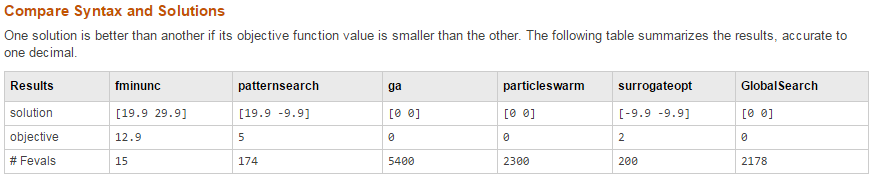

These results are typical:

fminunc quickly reaches the local solution within its starting basin, but does not explore outside this basin at all. fminunc has a simple calling syntax.
patternsearch takes more function evaluations than fminunc, and searches through several basins, arriving at a better solution than fminunc. The patternsearch calling syntax is the same as that of fminunc.
ga takes many more function evaluations than patternsearch. By chance it arrived at a better solution. In this case, ga found a point near the global optimum. ga is stochastic, so its results change with every run. ga has a simple calling syntax, but there are extra steps to have an initial population near [20,30].
particleswarm takes fewer function evaluations than ga, but more than patternsearch. In this case, particleswarm found the global optimum. particleswarm is stochastic, so its results change with every run. particleswarm has a simple calling syntax, but there are extra steps to have an initial population near [20,30].
surrogateopt stops when it reaches a function evaluation limit, which by default is 200 for a two-variable problem. surrogateopt has a simple calling syntax, but requires finite bounds. Although surrogateopt attempts to find a global solution, in this case the returned solution is not the global solution. Each function evaluation in surrogateopt takes a longer time than in most other solvers, because surrogateopt performs many auxiliary computations as part of its algorithm.
GlobalSearch run takes the same order of magnitude of function evaluations as ga and particleswarm, searches many basins, and arrives at a good solution. In this case, GlobalSearch found the global optimum. Setting up GlobalSearch is more involved than setting up the other solvers. As the example shows, before calling GlobalSearch, you must create both a GlobalSearch object (gs in the example), and a problem structure (problem). Then, you call the run method with gs and problem. For more details on how to run GlobalSearch, see Workflow for GlobalSearch and MultiStart.